#**IMPORTS & STYLE SETUP**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import glob
import re
import os

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
sns.set_style("whitegrid")

#**LOADING DATASETS**



In [ ]:
# Find all Week*.csv files
all_files = glob.glob("Week*.csv")

sorted_files = sorted(all_files, key=lambda x: int(re.search(r'Week\s*(\d+)', x).group(1)))


dfs = []
for file in sorted_files:
    try:
        df_temp = pd.read_csv(file, quotechar='"')
        dfs.append(df_temp)
        print(f"Loaded {file} → {len(df_temp)} rows")
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"\nTotal files: {len(sorted_files)}\n")

Loaded Week 1.csv → 5 rows
Loaded Week 2.csv → 7 rows
Loaded Week 3.csv → 7 rows
Loaded Week 4.csv → 7 rows
Loaded Week 5.csv → 7 rows
Loaded Week 6.csv → 7 rows
Loaded Week 7.csv → 7 rows
Loaded Week 8.csv → 7 rows
Loaded Week 9.csv → 6 rows

Total files: 9



In [ ]:
df = pd.concat(dfs, ignore_index=True)

In [ ]:
display(df)

,Date,Bonding_Minutes,Pet_Mood,Activity_Type,Energy_Level,Stress_Calmness,Indoor/Outdoor,Main_Bonding_Time
0,2025-12-10,40 Minutes,4,Walk,5,4,Outdoor,Morning
1,2025-12-11,20 Minutes,3,Quiet Cuddling,3,4,Indoor,Afternoon
2,2025-12-12,50 Minutes,5,"Play, Training",5,5,Indoor,Evening
3,2025-12-13,5 Minutes,2,Quiet Cuddling,2,2,Indoor,Afternoon
4,2025-12-14,30 Minutes,4,Walk,4,3,Outdoor,Evening
5,2025-12-15,25 minutes,4,Quiet Cuddling,4,3,Indoor,Evening
6,2025-12-16,35 minutes,4,"Walk , Play",5,4,Outdoor,Afternoon
7,2025-12-17,20 minutes,3,Quiet Cuddling,3,3,Indoor,Evening
8,2025-12-18,45 minutes,5,"Run, Walk",5,5,Outdoor,Evening
9,2025-12-19,25 minutes,3,Walk,4,3,Outdoor,Morning


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               60 non-null     object
 1   Bonding_Minutes    60 non-null     object
 2   Pet_Mood           60 non-null     int64 
 3   Activity_Type      60 non-null     object
 4   Energy_Level       60 non-null     int64 
 5   Stress_Calmness    60 non-null     int64 
 6   Indoor/Outdoor     60 non-null     object
 7   Main_Bonding_Time  60 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


None

In [ ]:
display(df.describe())

,Pet_Mood,Energy_Level,Stress_Calmness
count,60.000000,60.000000,60.000000
mean,3.433333,3.433333,3.300000
std,0.927301,0.980603,1.046382
min,2.000000,2.000000,2.000000
25%,3.000000,3.000000,2.000000
50%,3.500000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [ ]:
print("\nCombined dataset shape:", df.shape)

print("\nColumns and data types:")
print(df.dtypes)



Combined dataset shape: (60, 8)

Columns and data types:
Date                 object
Bonding_Minutes      object
Pet_Mood              int64
Activity_Type        object
Energy_Level          int64
Stress_Calmness       int64
Indoor/Outdoor       object
Main_Bonding_Time    object
dtype: object


In [ ]:
print("\nMissing values check:")
print(df.isnull().sum())


Missing values check:
Date                 0
Bonding_Minutes      0
Pet_Mood             0
Activity_Type        0
Energy_Level         0
Stress_Calmness      0
Indoor/Outdoor       0
Main_Bonding_Time    0
dtype: int64


#**DATA CLEANING AND PREPROCESSING**

In [ ]:
print("=== Before Cleaning ===")
print("Original shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

=== Before Cleaning ===
Original shape: (60, 8)
Missing Values:
 Date                 0
Bonding_Minutes      0
Pet_Mood             0
Activity_Type        0
Energy_Level         0
Stress_Calmness      0
Indoor/Outdoor       0
Main_Bonding_Time    0
dtype: int64


In [ ]:
# Clean Bonding_Minutes (remove text, convert to number)
df['Bonding_Minutes'] = df['Bonding_Minutes'].astype(str).str.replace(r'\s*minutes|Minutes\s*', '', regex=True, flags=re.IGNORECASE)
df['Bonding_Minutes'] = df['Bonding_Minutes'].str.strip()
df['Bonding_Minutes'] = pd.to_numeric(df['Bonding_Minutes'], errors='coerce')

In [ ]:
def parse_date_flexible(date_str):
    if pd.isna(date_str):
        return pd.NaT
    date_str = str(date_str).strip().strip('"')
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except:
        pass
    try:
        return pd.to_datetime(date_str, format='%B %d, %Y')
    except:
        pass
    return pd.to_datetime(date_str, errors='coerce', format='mixed')

df['Date'] = df['Date'].apply(parse_date_flexible)

In [ ]:
df['Activity_Type'] = df['Activity_Type'].astype(str).str.strip()
df['Activity_Type'] = df['Activity_Type'].str.replace(r'\s*,\s*', ' + ', regex=True)
df['Activity_Type'] = df['Activity_Type'].str.replace(r'\s*,\s*', ' + ', regex=True)
df['Activity_Type'] = df['Activity_Type'].str.replace(r'\s+', ' ', regex=True)
df['Activity_Type'] = df['Activity_Type'].str.title()

print("\nUnique Activity Types after standardization:")
print(df['Activity_Type'].value_counts())


Unique Activity Types after standardization:
Activity_Type
Quiet Cuddling     18
Walk               13
Run + Walk         13
Walk + Play         6
Training            4
Play                4
Play + Training     1
Walk + Training     1
Name: count, dtype: int64


In [ ]:
df = df.dropna(subset=['Bonding_Minutes', 'Pet_Mood'])
df = df.sort_values('Date').reset_index(drop=True)

In [ ]:
#Engineer Pregnancy Phase (skip rows with NaT Date)
conception = pd.to_datetime('2025-12-28')
mid = pd.to_datetime('2026-01-20')
recovery = pd.to_datetime('2026-02-01')

df['Pregnancy_Phase'] = 'Unknown'
valid = df['Date'].notna()

df.loc[valid & (df['Date'] < conception), 'Pregnancy_Phase'] = 'Pre-Conception'
df.loc[valid & (df['Date'] >= conception) & (df['Date'] < mid), 'Pregnancy_Phase'] = 'Early Pregnancy'
df.loc[valid & (df['Date'] >= mid) & (df['Date'] < recovery), 'Pregnancy_Phase'] = 'Mid Pregnancy'
df.loc[valid & (df['Date'] >= recovery), 'Pregnancy_Phase'] = 'Late / Appetite Recovery'

In [ ]:
print("\n=== After Cleaning ===")
print("Final shape:", df.shape)
print("Rows kept:", df.shape[0])
print("Invalid dates:", df['Date'].isna().sum())
print("\nPregnancy Phase distribution:\n", df['Pregnancy_Phase'].value_counts())
print("\nActivity_Type distribution after standardization:\n", df['Activity_Type'].value_counts())


=== After Cleaning ===
Final shape: (60, 9)
Rows kept: 60
Invalid dates: 0

Pregnancy Phase distribution:
 Pregnancy_Phase
Early Pregnancy             23
Pre-Conception              18
Mid Pregnancy               12
Late / Appetite Recovery     7
Name: count, dtype: int64

Activity_Type distribution after standardization:
 Activity_Type
Quiet Cuddling     18
Walk               13
Run + Walk         13
Walk + Play         6
Training            4
Play                4
Play + Training     1
Walk + Training     1
Name: count, dtype: int64


In [ ]:
print("\nFirst 5 rows after cleaning:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())
print("\nColumns and data types:")
print(df.dtypes)


First 5 rows after cleaning:


,Date,Bonding_Minutes,Pet_Mood,Activity_Type,Energy_Level,Stress_Calmness,Indoor/Outdoor,Main_Bonding_Time,Pregnancy_Phase
0,2025-12-10,40,4,Walk,5,4,Outdoor,Morning,Pre-Conception
1,2025-12-11,20,3,Quiet Cuddling,3,4,Indoor,Afternoon,Pre-Conception
2,2025-12-12,50,5,Play + Training,5,5,Indoor,Evening,Pre-Conception
3,2025-12-13,5,2,Quiet Cuddling,2,2,Indoor,Afternoon,Pre-Conception
4,2025-12-14,30,4,Walk,4,3,Outdoor,Evening,Pre-Conception



Last 5 rows:


,Date,Bonding_Minutes,Pet_Mood,Activity_Type,Energy_Level,Stress_Calmness,Indoor/Outdoor,Main_Bonding_Time,Pregnancy_Phase
55,2026-02-03,48,4,Training,4,3,Indoor,Morning,Late / Appetite Recovery
56,2026-02-04,27,4,Run + Walk,3,5,Outdoor,Morning,Late / Appetite Recovery
57,2026-02-05,31,3,Quiet Cuddling,5,4,Indoor,Afternoon,Late / Appetite Recovery
58,2026-02-06,21,5,Quiet Cuddling,4,5,Indoor,Evening,Late / Appetite Recovery
59,2026-02-07,30,4,Run + Walk,4,3,Outdoor,Afternoon,Late / Appetite Recovery



Columns and data types:
Date                 datetime64[ns]
Bonding_Minutes               int64
Pet_Mood                      int64
Activity_Type                object
Energy_Level                  int64
Stress_Calmness               int64
Indoor/Outdoor               object
Main_Bonding_Time            object
Pregnancy_Phase              object
dtype: object


In [ ]:
df

,Date,Bonding_Minutes,Pet_Mood,Activity_Type,Energy_Level,Stress_Calmness,Indoor/Outdoor,Main_Bonding_Time,Pregnancy_Phase
0,2025-12-10,40,4,Walk,5,4,Outdoor,Morning,Pre-Conception
1,2025-12-11,20,3,Quiet Cuddling,3,4,Indoor,Afternoon,Pre-Conception
2,2025-12-12,50,5,Play + Training,5,5,Indoor,Evening,Pre-Conception
3,2025-12-13,5,2,Quiet Cuddling,2,2,Indoor,Afternoon,Pre-Conception
4,2025-12-14,30,4,Walk,4,3,Outdoor,Evening,Pre-Conception
5,2025-12-15,25,4,Quiet Cuddling,4,3,Indoor,Evening,Pre-Conception
6,2025-12-16,35,4,Walk + Play,5,4,Outdoor,Afternoon,Pre-Conception
7,2025-12-17,20,3,Quiet Cuddling,3,3,Indoor,Evening,Pre-Conception
8,2025-12-18,45,5,Run + Walk,5,5,Outdoor,Evening,Pre-Conception
9,2025-12-19,25,3,Walk,4,3,Outdoor,Morning,Pre-Conception


#**EDA – Distributions & Visuals**

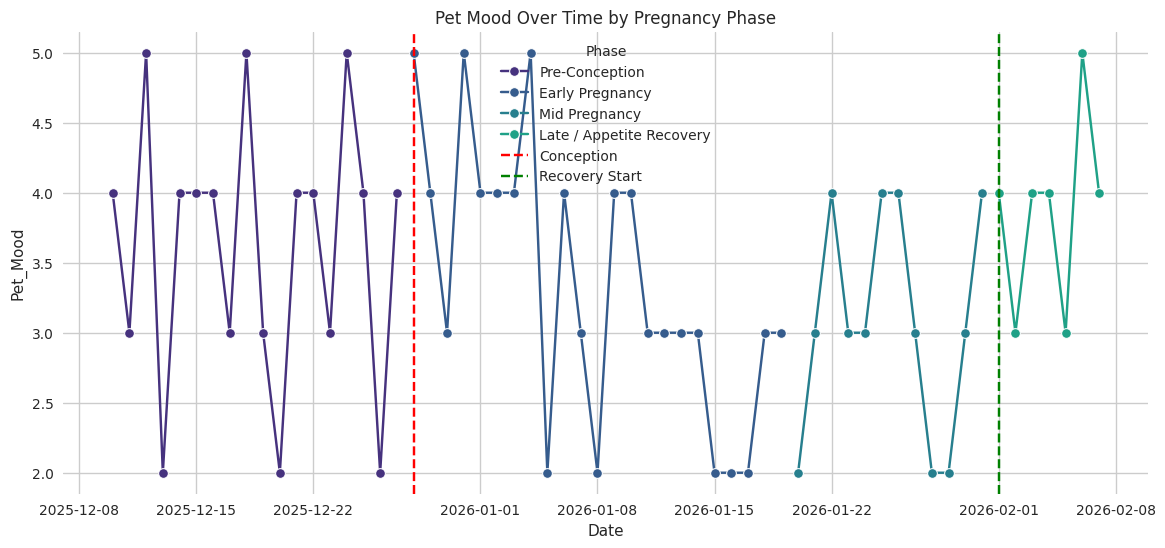

In [ ]:
#TIME-SERIES
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Pet_Mood', hue='Pregnancy_Phase', marker='o')
plt.axvline(pd.to_datetime('2025-12-28'), color='red', linestyle='--', label='Conception')
plt.axvline(pd.to_datetime('2026-02-01'), color='green', linestyle='--', label='Recovery Start')
plt.title('Pet Mood Over Time by Pregnancy Phase')
plt.legend(title='Phase')
plt.show()

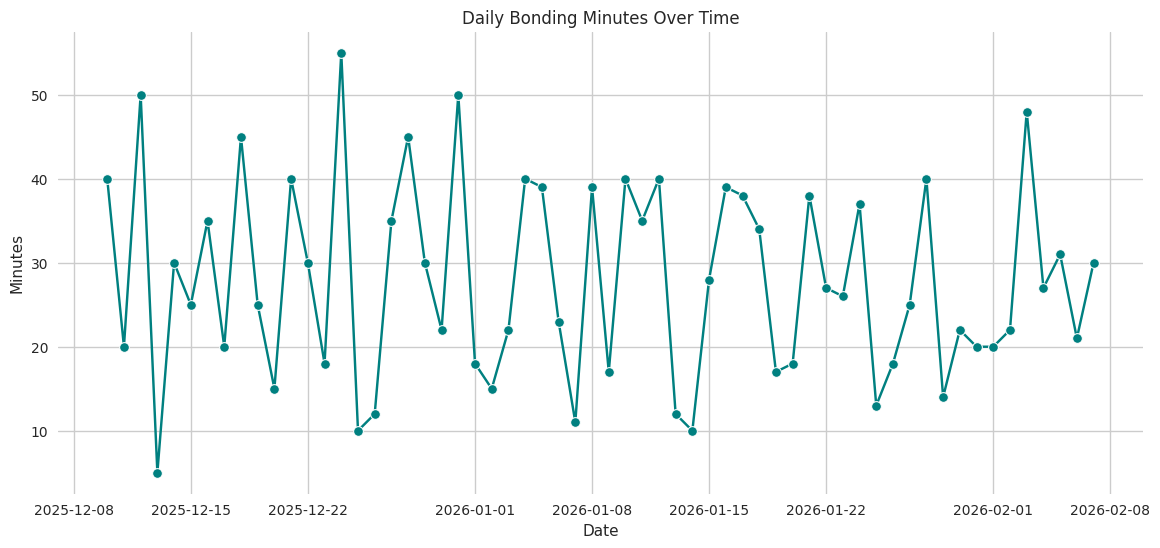

In [ ]:
#TIME-SERIES
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Bonding_Minutes', color='teal', marker='o')
plt.title('Daily Bonding Minutes Over Time')
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.grid(True)
plt.show()

/tmp/ipython-input-2268326478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pregnancy_Phase', y='Pet_Mood', palette= 'Set1')


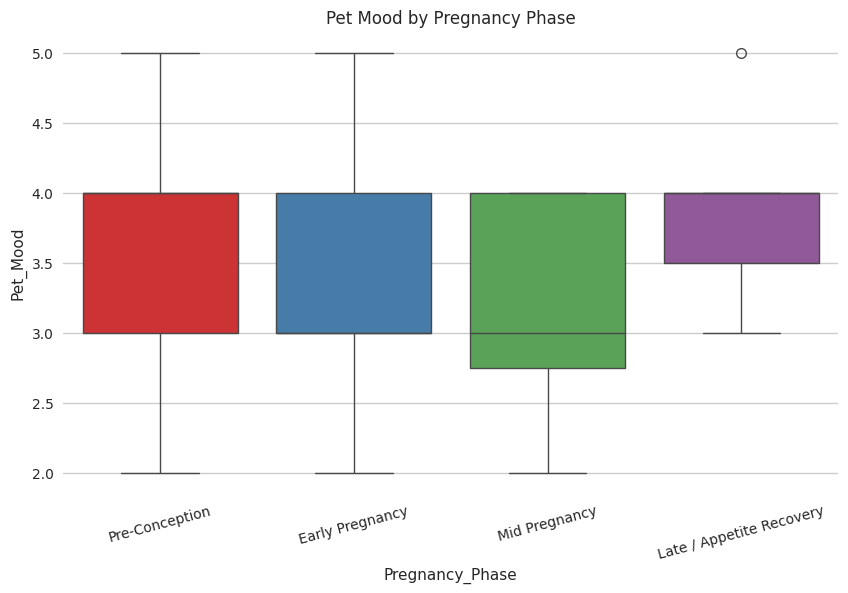

In [ ]:
#BOXPLOTS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pregnancy_Phase', y='Pet_Mood', palette= 'Set1')
plt.title('Pet Mood by Pregnancy Phase')
plt.xticks(rotation=15)
plt.show()

/tmp/ipython-input-3399071068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity_Type', y='Pet_Mood', palette='Pastel1')


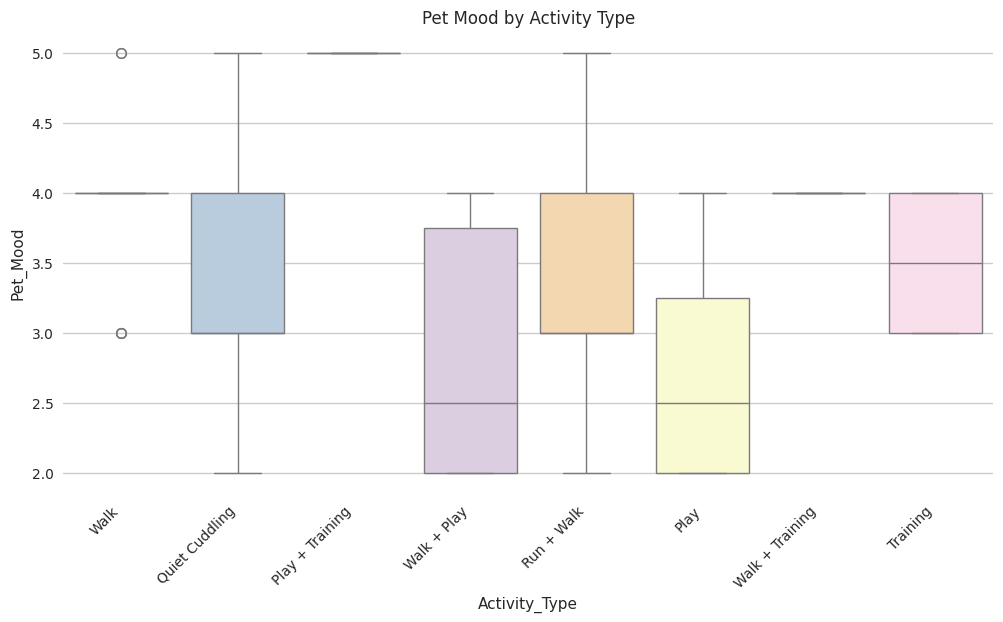

In [ ]:
#BOXPLOTS
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Activity_Type', y='Pet_Mood', palette='Pastel1')
plt.title('Pet Mood by Activity Type')
plt.xticks(rotation=45, ha='right')
plt.show()

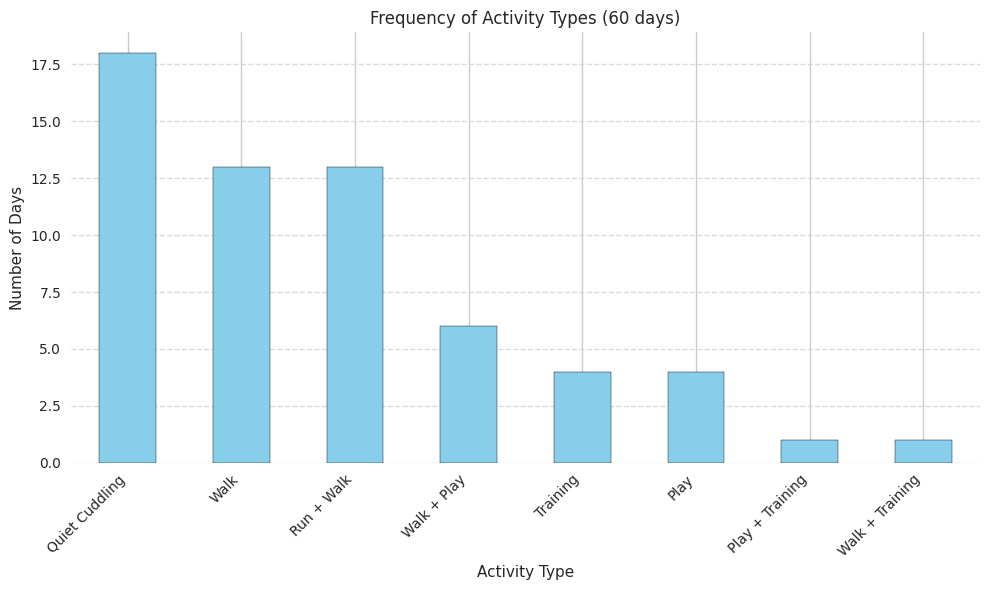

In [ ]:
#Activity Type Frequency
plt.figure(figsize=(10, 6))
df['Activity_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Activity Types (60 days)')
plt.xlabel('Activity Type')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-429508538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Bonding_Bucket', y='Pet_Mood', estimator='mean', errorbar='sd',palette='Pastel1' )


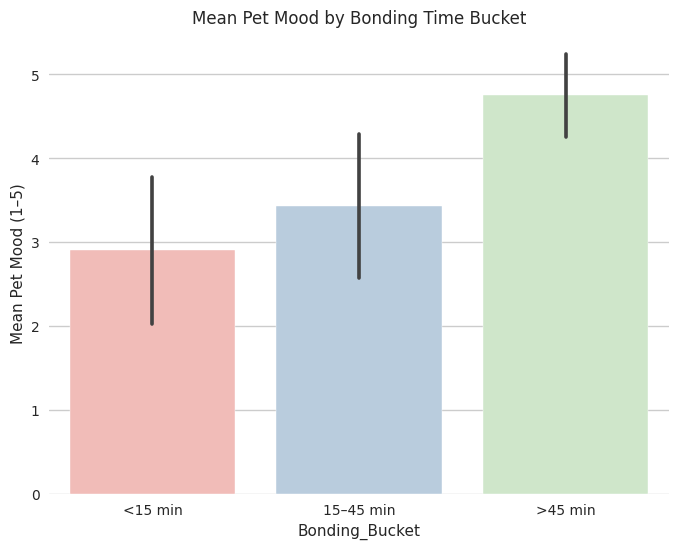

In [ ]:
df['Bonding_Bucket'] = pd.cut(df['Bonding_Minutes'], bins=[0, 15, 45, float('inf')], labels=['<15 min', '15–45 min', '>45 min'])
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Bonding_Bucket', y='Pet_Mood', estimator='mean', errorbar='sd',palette='Pastel1' )
plt.title('Mean Pet Mood by Bonding Time Bucket')
plt.ylabel('Mean Pet Mood (1–5)')
plt.show()

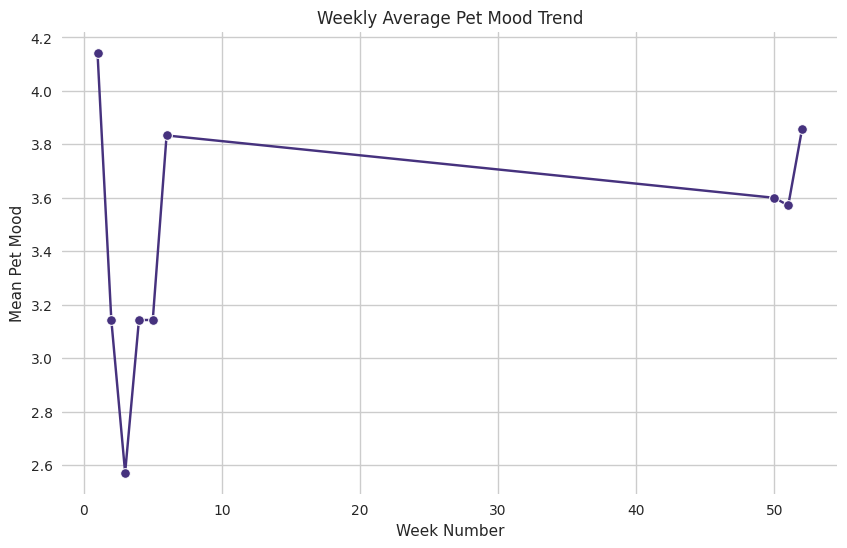

In [ ]:
df['Week'] = df['Date'].dt.isocalendar().week
weekly_mood = df.groupby('Week')['Pet_Mood'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_mood, x='Week', y='Pet_Mood', marker='o')
plt.title('Weekly Average Pet Mood Trend')
plt.ylabel('Mean Pet Mood')
plt.xlabel('Week Number')
plt.grid(True)
plt.show()

/tmp/ipython-input-1427974664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Indoor/Outdoor', y='Pet_Mood',palette='Set1')


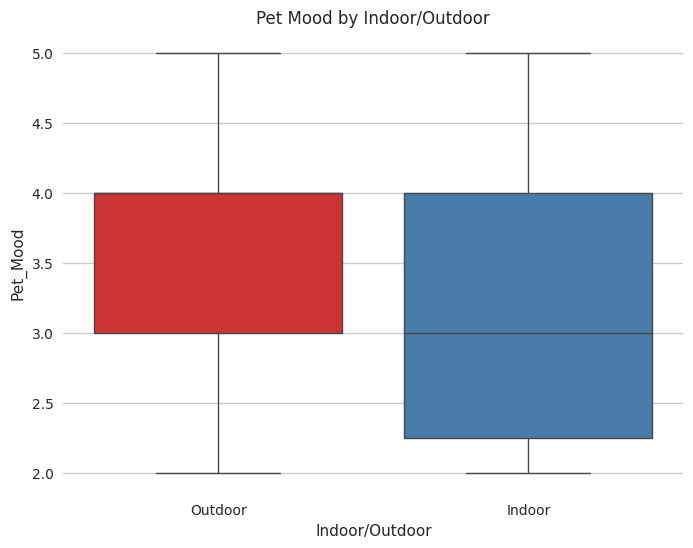

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Indoor/Outdoor', y='Pet_Mood',palette='Set1')
plt.title('Pet Mood by Indoor/Outdoor')
plt.show()

/tmp/ipython-input-3309961312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Main_Bonding_Time', y='Pet_Mood',palette='Set2')


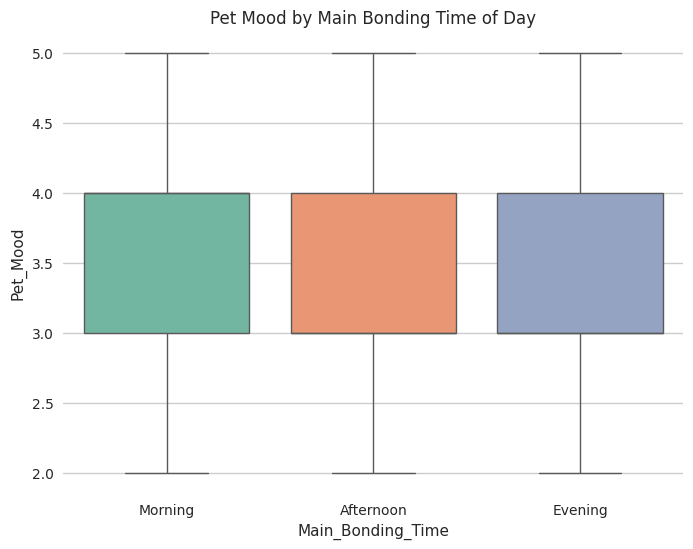

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Main_Bonding_Time', y='Pet_Mood',palette='Set2')
plt.title('Pet Mood by Main Bonding Time of Day')
plt.show()

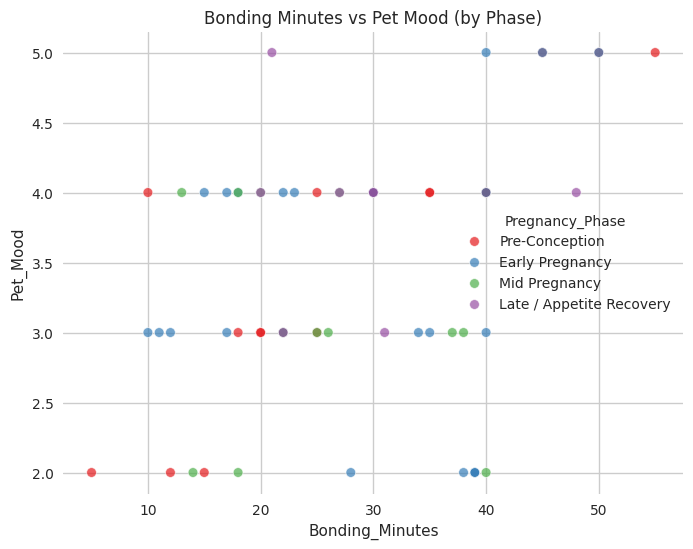

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Bonding_Minutes', y='Pet_Mood', hue='Pregnancy_Phase', alpha=0.7, palette='Set1')
plt.title('Bonding Minutes vs Pet Mood (by Phase)')
plt.grid(True)
plt.show()

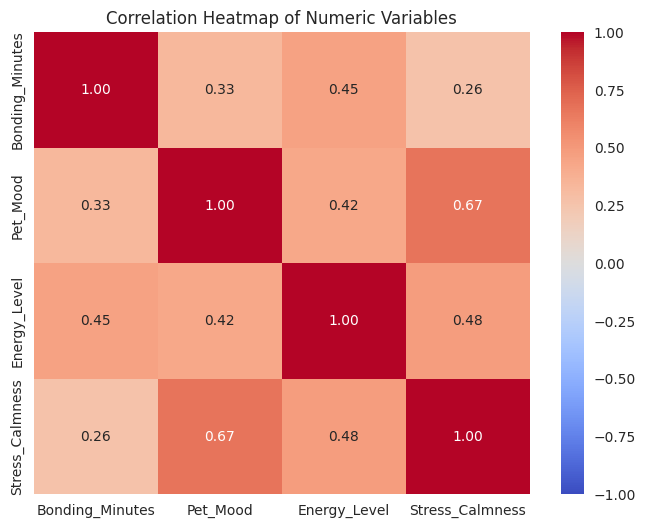

In [ ]:
#HEATMAP
numeric_cols = ['Bonding_Minutes', 'Pet_Mood', 'Energy_Level', 'Stress_Calmness']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#**STATISTICAL TEST**

In [ ]:
#Pearson Correlation (Bonding Minutes vs Pet Mood)
r, p = stats.pearsonr(df['Bonding_Minutes'], df['Pet_Mood'])
print(f"Pearson Correlation (Bonding Minutes vs Pet Mood): r = {r:.3f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Statistically significant (p < 0.05)")
else:
    print("→ Not statistically significant")

Pearson Correlation (Bonding Minutes vs Pet Mood): r = 0.330, p-value = 0.0100
→ Statistically significant (p < 0.05)


In [ ]:
#Independent t-test (Early vs Late/Recovery Mood)
early = df[df['Pregnancy_Phase'] == 'Early Pregnancy']['Pet_Mood'].dropna()
late = df[df['Pregnancy_Phase'] == 'Late / Appetite Recovery']['Pet_Mood'].dropna()

if len(early) > 1 and len(late) > 1:
    t, p = stats.ttest_ind(early, late, equal_var=False)  # Welch's t-test (unequal variance)
    print(f"\nt-test (Early vs Late/Recovery Mood): t = {t:.3f}, p = {p:.4f}")
    print(f"Mean mood Early: {early.mean():.2f}, Late: {late.mean():.2f}")
    if p < 0.05:
        print("→ Statistically significant difference")
    else:
        print("→ Not statistically significant (p > 0.05)")
else:
    print("\nNot enough data in one or both groups for t-test.")


t-test (Early vs Late/Recovery Mood): t = -1.536, p = 0.1465
Mean mood Early: 3.35, Late: 3.86
→ Not statistically significant (p > 0.05)


In [ ]:
#ANOVA (Mood across all Pregnancy Phases)
print("\nANOVA (Pet Mood across all Pregnancy Phases):")
groups = [df[df['Pregnancy_Phase'] == phase]['Pet_Mood'].dropna() for phase in df['Pregnancy_Phase'].unique() if len(df[df['Pregnancy_Phase'] == phase]) > 1]
if len(groups) >= 2:
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("→ Significant difference across phases")
    else:
        print("→ No significant difference")
else:
    print("Not enough valid groups for ANOVA.")


ANOVA (Pet Mood across all Pregnancy Phases):
F-statistic = 1.368, p-value = 0.2619
→ No significant difference


In [ ]:
activity_averages = df.groupby('Activity_Type')['Pet_Mood'].mean().reset_index()
print("\nMean Mood per Activity Type:")
display(activity_averages)


Mean Mood per Activity Type:


,Activity_Type,Pet_Mood
0,Play,2.750000
1,Play + Training,5.000000
2,Quiet Cuddling,3.222222
3,Run + Walk,3.538462
4,Training,3.500000
5,Walk,3.923077
6,Walk + Play,2.833333
7,Walk + Training,4.000000


In [ ]:
df.to_csv('full_cleaned_pet_data.csv', index=False)
print("Cleaned data saved as 'full_cleaned_pet_data.csv'")

Cleaned data saved as 'full_cleaned_pet_data.csv'


In [ ]:
# print("\n=== Summary of Key Findings ===")
# print("1. Pearson correlation: Bonding Minutes vs Pet Mood → r =", round(r, 3), ", p =", round(p, 4))
# print("   → Moderate positive relationship (significant)")
# print("2. t-test: Early vs Late/Recovery Mood → t =", round(t, 3), ", p =", round(p, 4))
# print("   → Not significant, but mean mood higher in recovery phase")
# print("3. Pregnancy phase shows clear mood dip (mid) and recovery (late) in time-series and boxplots")
# print("4. Active activities (Walk, Play, Run) associate with higher mood medians than Quiet Cuddling")
# print("5. Quiet Cuddling most frequent, likely due to pregnancy energy reduction")